## Part I

#### Method I to load iris dataset

In [4]:
#Import library and iris dataset
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris

In [5]:
df=load_iris()

In [6]:
df.feature_names,df.target_names

(['sepal length (cm)',
  'sepal width (cm)',
  'petal length (cm)',
  'petal width (cm)'],
 array(['setosa', 'versicolor', 'virginica'], dtype='<U10'))

In [7]:
data=pd.DataFrame(data=df.data,columns=df.feature_names)

In [8]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [9]:
data['Species']=df.target

In [10]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [11]:
data.shape

(150, 5)

#### Method II 

In [12]:
import seaborn as sn

In [13]:
df1=sn.load_dataset('iris')

In [14]:
df1.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [15]:
#from sklearn.preprocessing import LabelEncoder
#le = LabelEncoder()

# Fit and transform the labels
#df["species"] = le.fit_transform(df["species"])

### Extracting Datasets

In [16]:
X=df1.drop(columns='species',axis=1)
y=df1['species']

##### Split Dataset

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4,random_state=42)

**X**: Represents the feature matrix (independent variables or predictors).
    
**y**: Represents the target vector (dependent variable or output).

**Training set**: Used to train the model.

**Testing set**: Used to evaluate the model's performance.

Here, 40% of the dataset will be used as the testing set, while the remaining 60% will be used as the training set.

Using a fixed random state ensures the split is reproducible, i.e., running the code multiple times will yield the same split of training and testing sets.

In [19]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((90, 4), (60, 4), (90,), (60,))

### Fit the model

In [20]:
from sklearn.tree import DecisionTreeClassifier

In [21]:
model=DecisionTreeClassifier(max_depth=3)
model.fit(X_train,y_train) #Model fit on train data

DecisionTreeClassifier(max_depth=3)

In [22]:
prediction=model.predict(X_test)
print(prediction) #prediction on X test data

['versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa'
 'versicolor' 'virginica' 'versicolor' 'versicolor' 'virginica' 'setosa'
 'setosa' 'setosa' 'setosa' 'versicolor' 'virginica' 'versicolor'
 'versicolor' 'virginica' 'setosa' 'virginica' 'setosa' 'virginica'
 'virginica' 'virginica' 'virginica' 'virginica' 'setosa' 'setosa'
 'setosa' 'setosa' 'versicolor' 'setosa' 'setosa' 'virginica' 'versicolor'
 'setosa' 'setosa' 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa'
 'setosa' 'versicolor' 'versicolor' 'virginica' 'versicolor' 'virginica'
 'versicolor' 'virginica' 'versicolor' 'setosa' 'virginica' 'versicolor'
 'setosa' 'setosa' 'setosa' 'versicolor']


In [23]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [24]:
Accuracy=accuracy_score(prediction,y_test) #accuracy on y_test data
print(Accuracy)

0.9833333333333333


In [25]:
report=classification_report(prediction,y_test)
print(report)

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        23
  versicolor       1.00      0.95      0.97        20
   virginica       0.94      1.00      0.97        17

    accuracy                           0.98        60
   macro avg       0.98      0.98      0.98        60
weighted avg       0.98      0.98      0.98        60



### Precision

Precision measures how many of the predicted positive instances are actually correct.  
**Formula**:  
$$
\text{Precision} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Positives}}
$$

A high precision means the model has fewer false positives.

---

### Recall

Recall measures how many of the actual positive instances were correctly predicted.  
**Formula**:  
$$
\text{Recall} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Negatives}}
$$

A high recall means the model has fewer false negatives.

---

### F1-Score

The harmonic mean of precision and recall, balancing the trade-off between the two.  
**Formula**:  
$$
\text{F1-Score} = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}
$$

A high F1-score indicates a good balance between precision and recall.


### Interpretation

#### Class-Specific Performance

- **Setosa**:  
  - **Precision, Recall, and F1-Score**: **1.00**  
    - The model correctly identified all 23 instances of Setosa with no false positives or false negatives.  
  - **Support**: **23 instances**

- **Versicolor**:  
  - **Precision**: **1.00**  
    - All predicted Versicolor instances were correct (no false positives).  
  - **Recall**: **0.95**  
    - 95% of the actual Versicolor instances were correctly identified (1 false negative).  
  - **F1-Score**: **0.97**  
    - Indicates a strong balance between precision and recall.  
  - **Support**: **20 instances**

- **Virginica**:  
  - **Precision**: **0.94**  
    - 94% of the predicted Virginica instances were correct (1 false positive).  
  - **Recall**: **1.00**  
    - All actual Virginica instances were correctly identified (no false negatives).  
  - **F1-Score**: **0.97**  
    - Shows a good balance between precision and recall.  
  - **Support**: **17 instances**

---

#### Overall Model Performance

- **Accuracy**: **0.98** (98%)  
  - The model correctly classified 98% of all 60 instances.  

- **Macro Average**:  
  - **Precision, Recall, F1-Score**: **0.98**  
    - Average performance across all classes, treating them equally.  

- **Weighted Average**:  
  - **Precision, Recall, F1-Score**: **0.98**  
    - Average performance across all classes, weighted by the number of instances in each class.


## Decision Tree Diagram

In [143]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

In [145]:
feature_names=df.feature_namesbd
target_name=df.target_names

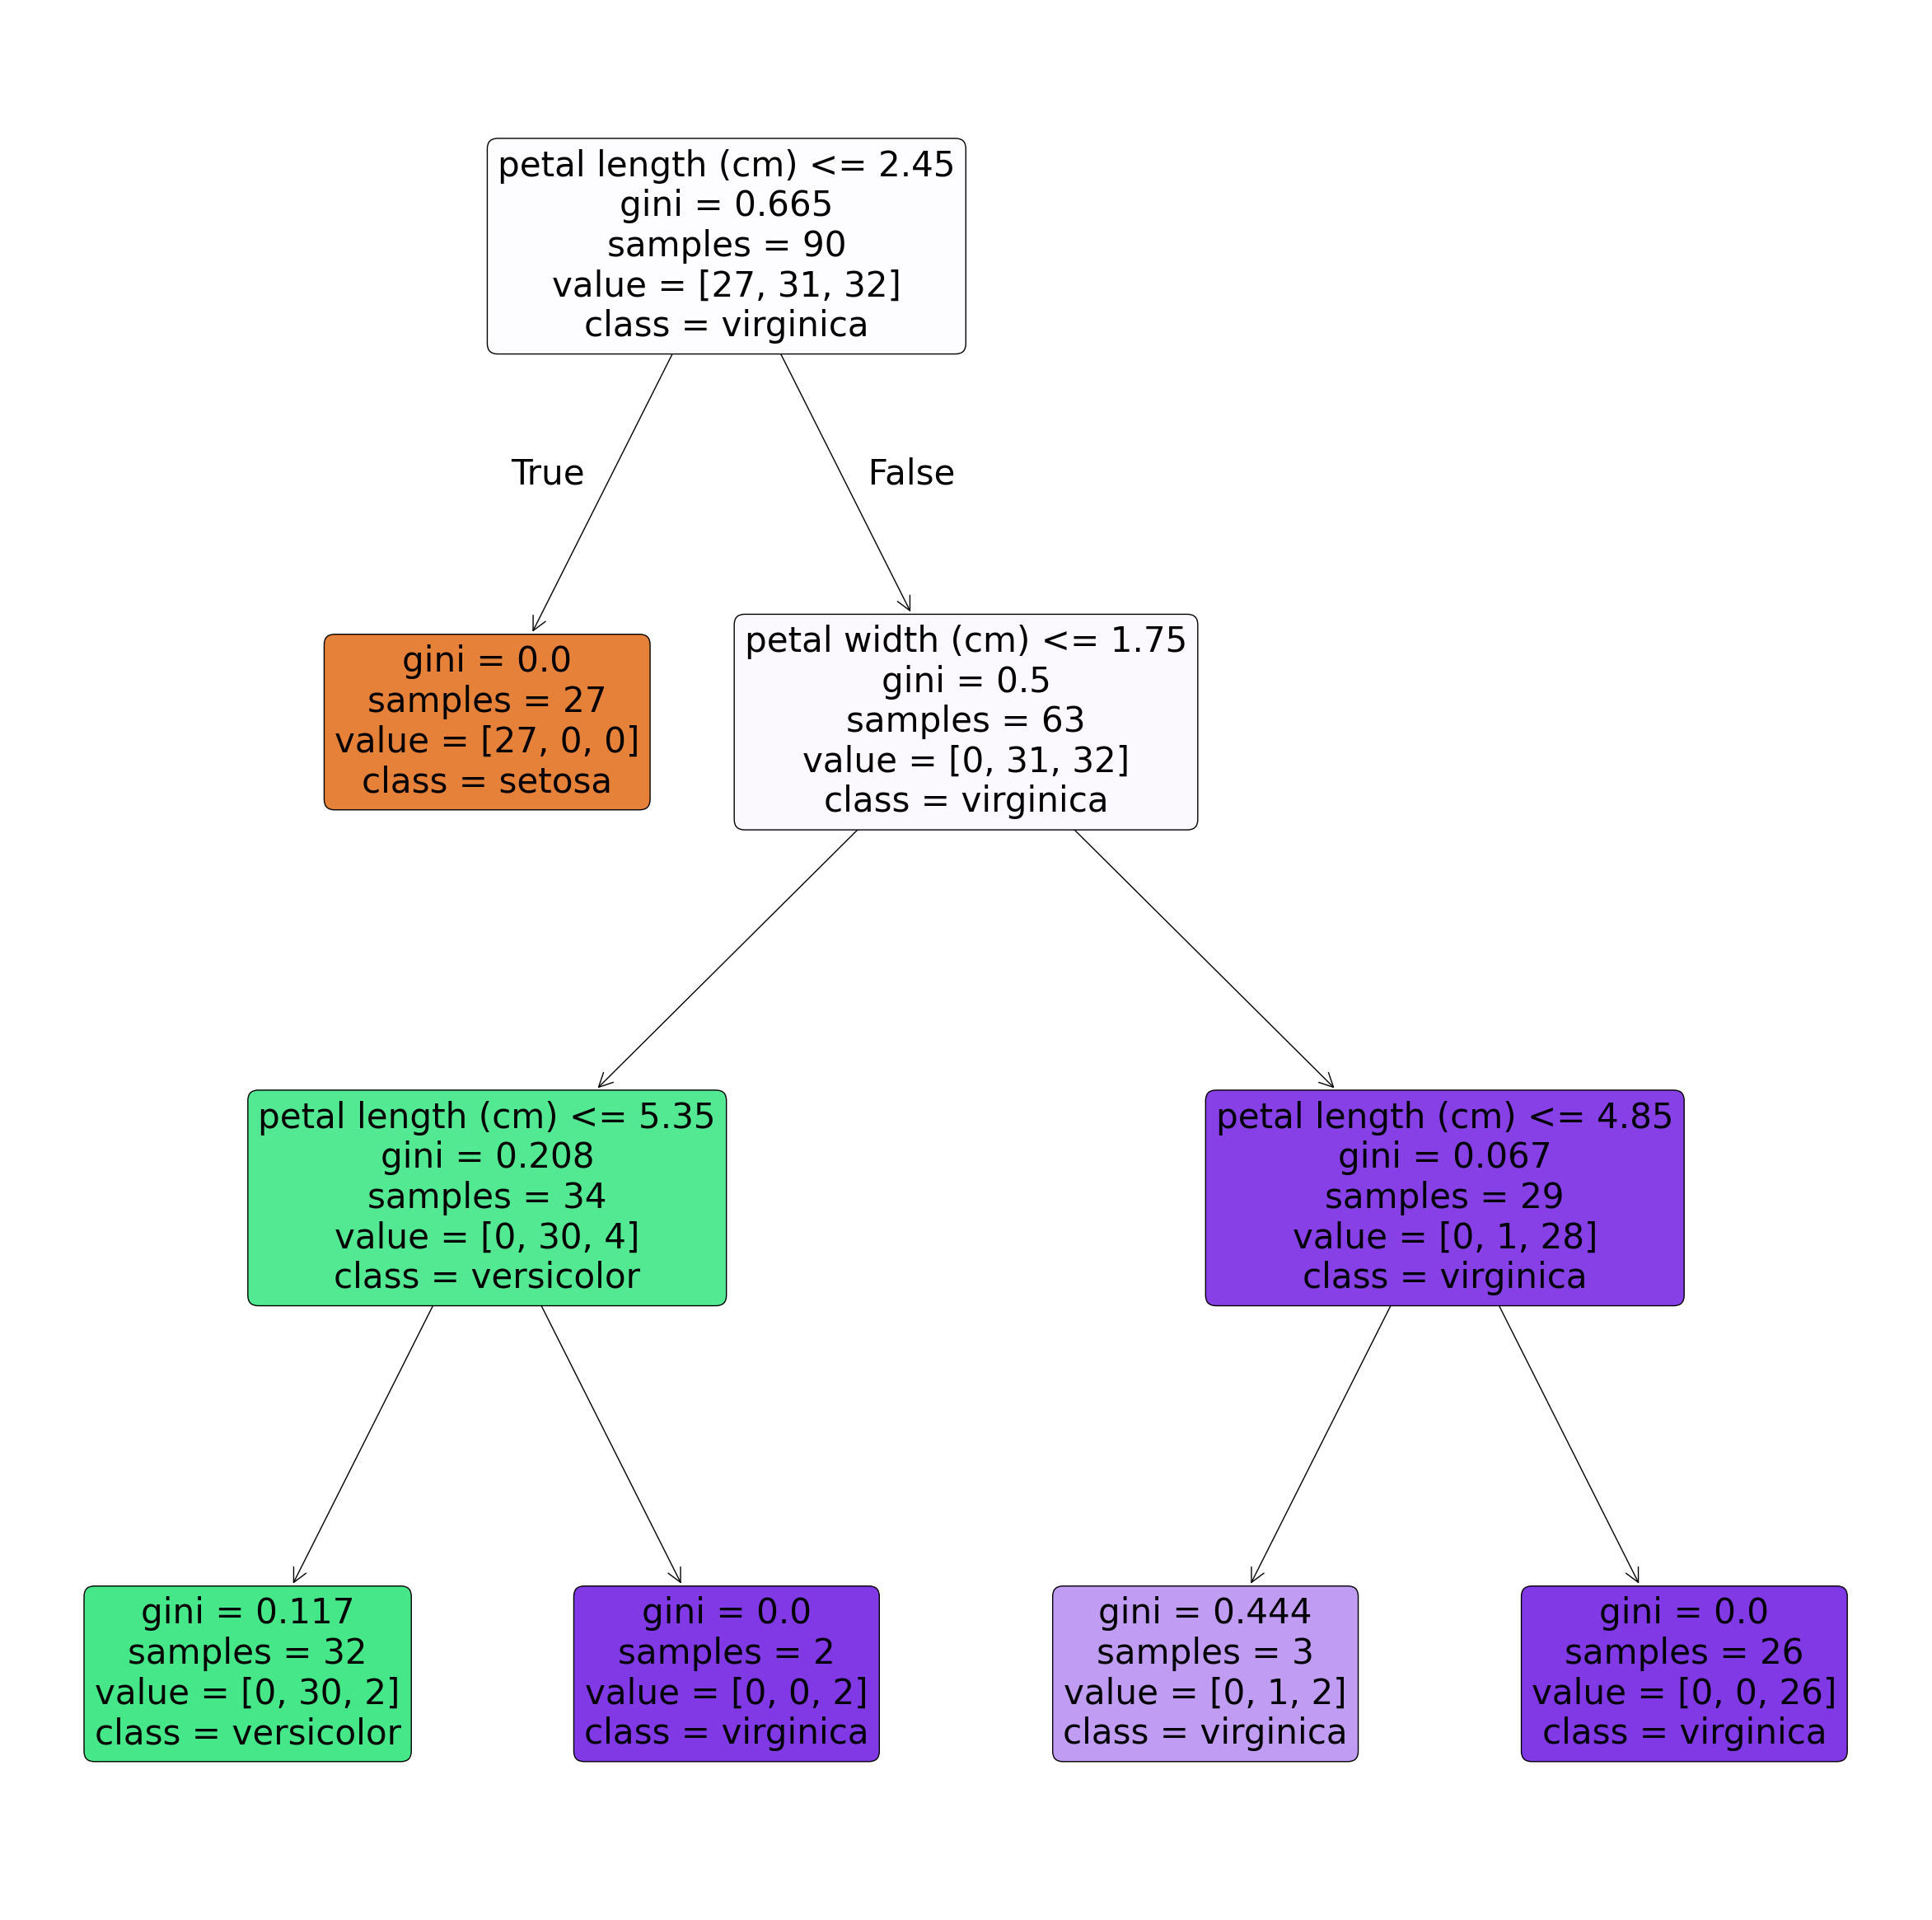

In [147]:
plt.figure(figsize=(30,30))
plot_tree(model,feature_names=feature_names,class_names=target_name,rounded=True,filled=True)
plt.show()

### Decision Tree Analysis

#### **Root Node**  
- **Condition**: `petal length (cm) <= 2.45`  
  - First split in the dataset.  
  - Separates samples based on whether the petal length is less than or equal to 2.45 cm.  
- **Gini**: **0.665** Indicates moderate impurity, meaning the 90 samples are a mix of all three classes (Setosa, Versicolor, Virginica).  
- **Samples**: **90**  
  - Total samples at the root.  
- **Value**: `[27, 31, 32]`  
  - Class distribution:  
    - 27 belong to Setosa.  
    - 31 belong to Versicolor.  
    - 32 belong to Virginica.  
- **Class**: **Virginica**  
  - Virginica is the majority class at this level.

---

#### **Left Branch (True: `petal length (cm) <= 2.45`)**  
- **Gini**: **0.0**  
  - Indicates a pure split (no impurity).  
- **Samples**: **27**  
  - All samples at this node belong to one class.  
- **Value**: `[27, 0, 0]`  
  - Class distribution:  
    - 27 belong to Setosa.  
- **Class**: **Setosa**  
  - The node predicts all samples in this branch as Setosa.  
- **Interpretation**:  
  - If the petal length is less than or equal to 2.45 cm, the sample is classified as Setosa with 100% certainty.

---

#### **Right Branch (False: `petal length (cm) > 2.45`)**  
- **Condition**: `petal width (cm) <= 1.75`  
  - Splits the remaining samples (63) based on petal width.  
- **Gini**: **0.5**  
  - Indicates impurity, as the node contains both Versicolor and Virginica samples.  
- **Samples**: **63**  
  - Total samples in this branch.  
- **Value**: `[0, 31, 32]`  
  - Class distribution:  
    - 31 belong to Versicolor.  
    - 32 belong to Virginica.  
- **Class**: **Virginica**  
  - Virginica is slightly more frequent in this split.

---

### Sub-Branches  

#### **Left Sub-Branch (True: `petal width (cm) <= 1.75`)**  
- **Condition**: `petal length (cm) <= 5.35`  
  - Splits the 34 samples based on petal length.  
- **Gini**: **0.208**  
  - Low impurity; mostly Versicolor with a few Virginica samples.  
- **Samples**: **34**  
  - Remaining samples in this branch.  
- **Value**: `[0, 30, 4]`  
  - Class distribution:  
    - 30 belong to Versicolor.  
    - 4 belong to Virginica.  
- **Class**: **Versicolor**  
  - Versicolor is the dominant class.

---

##### **Further Splits**  
- **Left Node (True: `petal length (cm) <= 5.35`)**  
  - **Gini**: **0.117**  
    - Very low impurity.  
  - **Samples**: **32**  
  - **Value**: `[0, 30, 2]`  
    - 30 are Versicolor.  
    - 2 are Virginica.  
  - **Class**: **Versicolor**  

- **Right Node (False: `petal length (cm) > 5.35`)**  
  - **Gini**: **0.0**  
    - Pure split.  
  - **Samples**: **2**  
  - **Value**: `[0, 0, 2]`  
    - All 2 samples are Virginica.  
  - **Class**: **Virginica**

---

#### **Right Sub-Branch (False: `petal width (cm) > 1.75`)**  
- **Condition**: `petal length (cm) <= 4.85`  
  - Splits the remaining 29 samples.  
- **Gini**: **0.067**  
  - Very low impurity.  
- **Samples**: **29**  
- **Value**: `[0, 1, 28]`  
  - Class distribution:  
    - 1 sample is Versicolor.  
    - 28 samples are Virginica.  
- **Class**: **Virginica**

---

##### **Further Splits**  
- **Left Node (True: `petal length (cm) <= 4.85`)**  
  - **Gini**: **0.444**  
    - Some impurity (mix of Versicolor and Virginica).  
  - **Samples**: **3**  
  - **Value**: `[0, 1, 2]`  
    - 1 sample is Versicolor.  
    - 2 samples are Virginica.  
  - **Class**: **Virginica**

- **Right Node (False: `petal length (cm) > 4.85`)**  
  - **Gini**: **0.0**  
    - Pure split.  
  - **Samples**: **26**  
  - **Value**: `[0, 0, 26]`  
    - All 26 samples are Virginica.  
  - **Class**: **Virginica**


# Example II Drugs Analysis

In [148]:
import pandas as pd
import numpy as np

In [151]:
drug=pd.read_csv(r"C:\Users\Admin\MSc Applied Statistics SPU\csv file\drug200.csv")

In [152]:
drug.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [153]:
drug.shape

(200, 6)

In [154]:
drug.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [161]:
from sklearn.preprocessing import LabelEncoder

In [162]:
Le=LabelEncoder()
drug['Sex']=Le.fit_transform(drug['Sex'])
drug['BP']=Le.fit_transform(drug['BP'])
drug['Cholesterol']=Le.fit_transform(drug['Cholesterol'])

In [163]:
X=drug.drop(columns='Drug',axis=1)
y=drug['Drug']

In [164]:
from sklearn.model_selection import train_test_split

In [174]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4,random_state=42)

In [175]:
from sklearn.tree import DecisionTreeClassifier

In [176]:
DT=DecisionTreeClassifier()
DT.fit(X_train,y_train)

DecisionTreeClassifier()

In [177]:
y_predict=DT.predict(X_test)
print(y_predict)

['drugX' 'drugY' 'drugX' 'drugC' 'drugY' 'drugY' 'drugY' 'drugX' 'drugA'
 'drugX' 'drugA' 'drugX' 'drugY' 'drugA' 'drugB' 'drugY' 'drugB' 'drugX'
 'drugC' 'drugY' 'drugB' 'drugX' 'drugX' 'drugY' 'drugY' 'drugY' 'drugC'
 'drugX' 'drugY' 'drugX' 'drugY' 'drugC' 'drugC' 'drugY' 'drugA' 'drugY'
 'drugX' 'drugA' 'drugY' 'drugA' 'drugX' 'drugX' 'drugX' 'drugY' 'drugY'
 'drugC' 'drugY' 'drugY' 'drugY' 'drugX' 'drugX' 'drugY' 'drugX' 'drugY'
 'drugX' 'drugY' 'drugA' 'drugY' 'drugY' 'drugY' 'drugA' 'drugY' 'drugB'
 'drugY' 'drugX' 'drugY' 'drugY' 'drugY' 'drugY' 'drugB' 'drugX' 'drugX'
 'drugX' 'drugB' 'drugA' 'drugX' 'drugY' 'drugX' 'drugA' 'drugX']


In [178]:
#Check model accuracy
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [179]:
Model_accuracy=accuracy_score(y_predict,y_test)
Model_accuracy

1.0

In [180]:
report=classification_report(y_predict,y_test)
print(report)

              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00        10
       drugB       1.00      1.00      1.00         6
       drugC       1.00      1.00      1.00         6
       drugX       1.00      1.00      1.00        25
       drugY       1.00      1.00      1.00        33

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



In [182]:
CM=confusion_matrix(y_predict,y_test)
CM

array([[10,  0,  0,  0,  0],
       [ 0,  6,  0,  0,  0],
       [ 0,  0,  6,  0,  0],
       [ 0,  0,  0, 25,  0],
       [ 0,  0,  0,  0, 33]], dtype=int64)

### Decision Tree Diagram

In [184]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

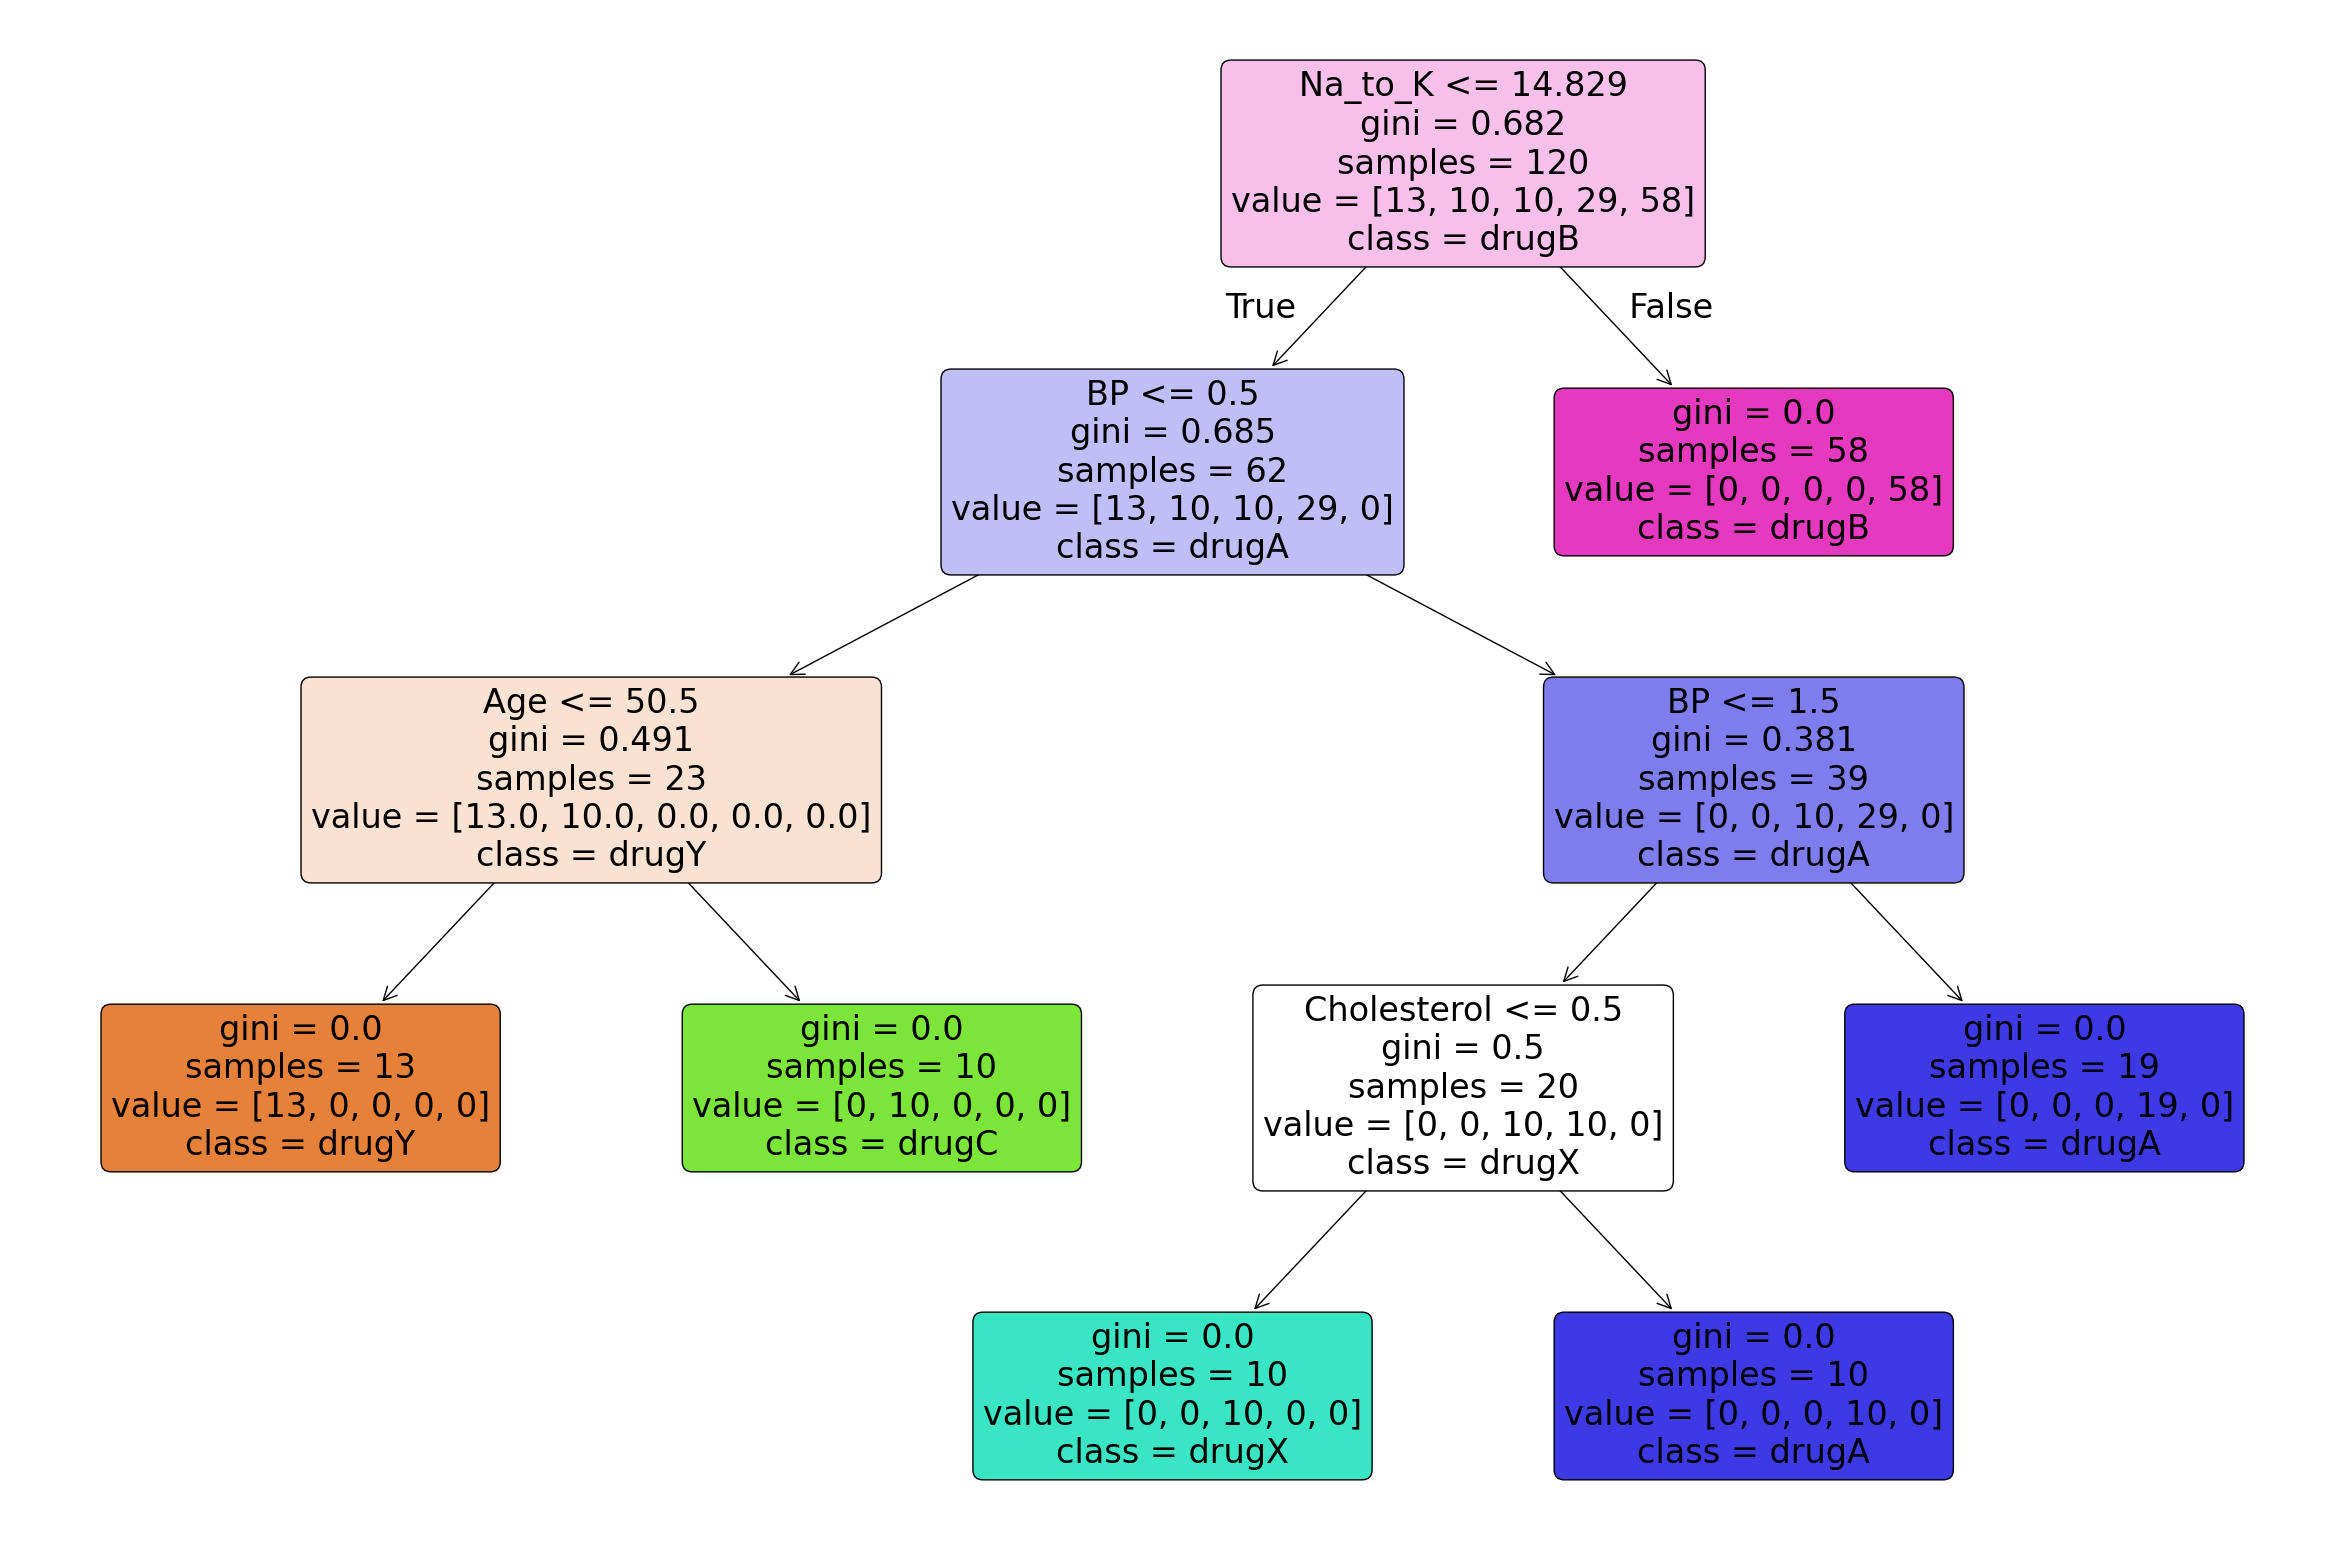

In [188]:
plt.figure(figsize=(30,20))
plot_tree(DT,feature_names=drug.columns.tolist(),class_names=y.unique().astype(str).tolist(),
          rounded=True,filled=True)
plt.show()

# Decision Tree Interpretation

#### Root Node 
- Splits based on **"Na to K" range**.
  - If **"Na to K" <= 14.829**, predicts **"drugB"**.
  - If **"Na to K" > 14.829**, proceeds to the next level.

#### Level 1
- **Left branch** (Na to K <= 14.829): Leaf node predicts **"drugB"**.
- **Right branch** (Na to K > 14.829): Splits further based on **"BP"**.

#### Level 2
- **Left branch** (BP <= 0.5): Leaf node predicts **"drugA"**.
- **Right branch** (BP > 0.5): Splits further based on **"Age"**.

#### Level 3
- **Left branch** (Age <= 50.5): Splits further based on **"Cholesterol"**.
- **Right branch** (Age > 50.5): Leaf node predicts **"drugA"**.

#### Level 4
- **Left branch** (Cholesterol <= 0.5): Leaf node predicts **"drugX"**.
- **Right branch** (Cholesterol > 0.5): Leaf node predicts **"drugA"**.

---

#### Overall
The decision tree makes predictions based on a combination of:
- **Na to K range**, **Blood Pressure (BP)**, **Age*, **Cholesterol level**


# New example

In [28]:
import pandas as pd
import numpy as np

In [38]:
data=pd.read_csv('HD.csv')

### Dataset Description

- **age**: Age of the patient (Numeric).  
- **sex**: Gender of the patient.  
  - Values:  
    - 1 = Male  
    - 0 = Female  
- **cp**: Chest pain type.  
  - Values:  
    - 0 = Typical angina  
    - 1 = Atypical angina  
    - 2 = Non-anginal pain  
    - 3 = Asymptomatic  
- **trestbps**: Resting blood pressure (in mm Hg) (Numeric).  
- **chol**: Serum cholesterol level (in mg/dl) (Numeric).  
- **fbs**: Fasting blood sugar > 120 mg/dl.  
  - Values:  
    - 1 = True  
    - 0 = False  
- **restecg**: Resting electrocardiographic results.  
  - Values:  
    - 0 = Normal  
    - 1 = ST-T wave abnormality  
    - 2 = Left ventricular hypertrophy  
- **thalach**: Maximum heart rate achieved (Numeric).  
- **exang**: Exercise-induced angina.  
  - Values:  
    - 1 = Yes  
    - 0 = No  
- **oldpeak**: ST depression induced by exercise relative to rest (Numeric).  
- **slope**: Slope of the peak exercise ST segment.  
  - Values:  
    - 0 = Upsloping  
    - 1 = Flat  
    - 2 = Downsloping  
- **ca**: Number of major vessels (0-3) colored by fluoroscopy.  
  - Values: 0, 1, 2, 3  
- **thal**: Thalassemia types.  
  - Values:  
    - 1 = Normal  
    - 2 = Fixed defect  
    - 3 = Reversible defect  
- **target**: Outcome variable (heart attack risk).  
  - Values:  
    - 1 = More chance of heart attack  
    - 0 = Less chance of heart attack  


In [39]:
data.head() #1 = more chance of heart attack, 0 = less chance of heart attack.


,age,sex,cp,trestbps,chol,fbs,restecg,thalachh,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [40]:
from sklearn.preprocessing import LabelEncoder

categories = ['More chance of heart attack', 'Less chance of heart attack']

# Initialize and fit the LabelEncoder
le = LabelEncoder()
le.fit(categories)

# Reverse the encoding
data['target'] = le.inverse_transform(data['target'])

In [41]:
data['target'].value_counts()

target
More chance of heart attack    977
Less chance of heart attack    911
Name: count, dtype: int64

In [42]:
X=data.drop(columns='target')
y=data['target']

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [53]:
from sklearn.tree import DecisionTreeClassifier,plot_tree

In [47]:
model=DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier()

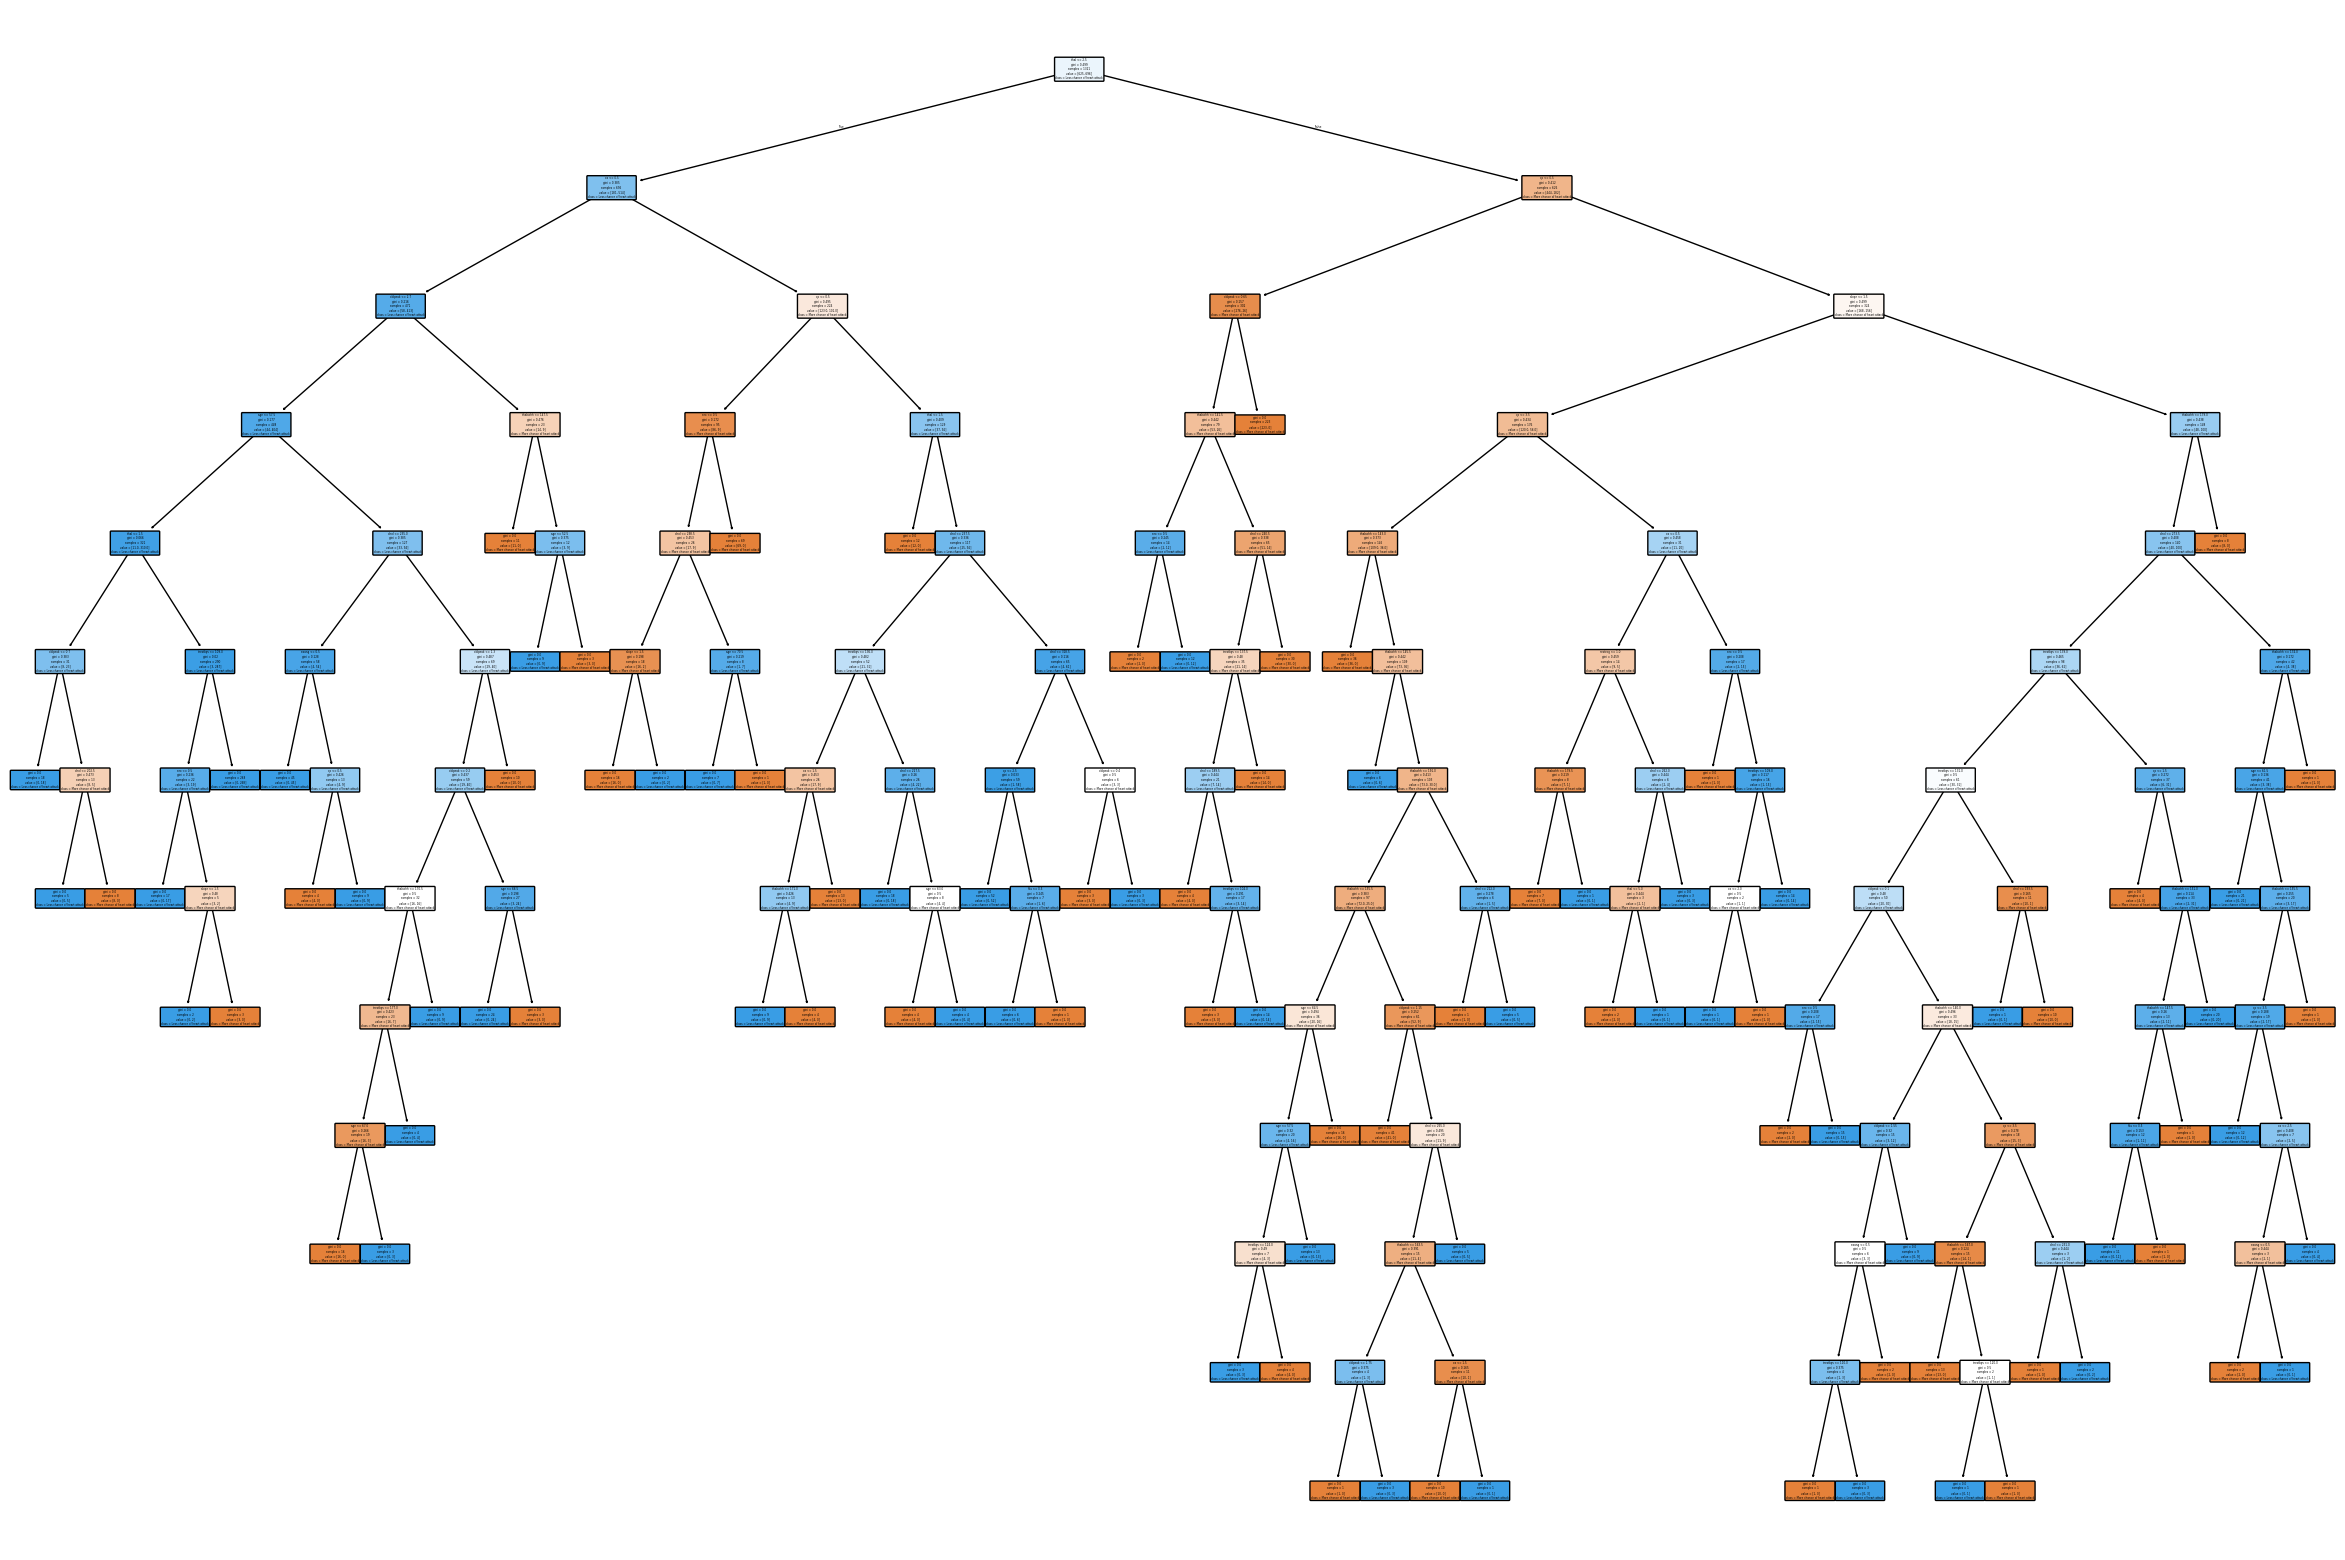

In [57]:
import matplotlib.pyplot as plt

plt.figure(figsize=(30,20))
plot_tree(model,feature_names=data.columns.tolist(),class_names=y.unique().astype(str).tolist(),
          rounded=True,filled=True)
plt.show()


In [67]:
max_depths = np.arange(1,15)
train_accuracy = np.empty(len(max_depths))
test_accuracy = np.empty(len(max_depths))

In [68]:
for i, k in enumerate(max_depths):
    DT = DecisionTreeClassifier(max_depth=k)
    DT.fit(X_train, y_train)
    
    #Computing Training Accuracy
    train_accuracy[i] = DT.score(X_train, y_train)
    test_accuracy[i] = DT.score(X_test, y_test)

print(train_accuracy)
print(test_accuracy)

[0.72520818 0.74186223 0.82664648 0.86071158 0.87206662 0.90310371
 0.9341408  0.95987888 0.98107494 0.99015897 0.99697199 1.
 1.         1.        ]
[0.69135802 0.7319224  0.81481481 0.81481481 0.84126984 0.86772487
 0.8712522  0.91710758 0.92416226 0.94179894 0.94356261 0.94708995
 0.95590829 0.95061728]


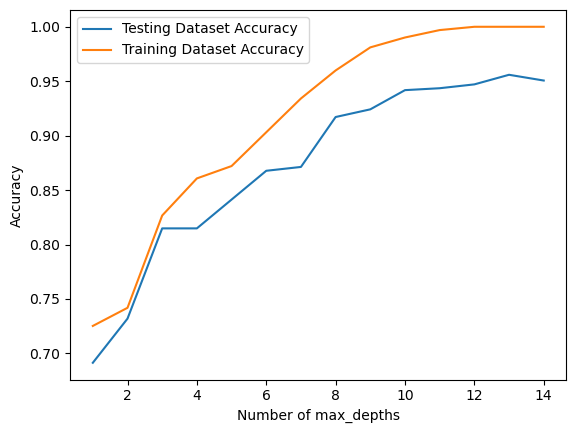

In [69]:
plt.plot(max_depths, test_accuracy, label = "Testing Dataset Accuracy")
plt.plot(max_depths, train_accuracy, label = "Training Dataset Accuracy")

plt.legend()
plt.xlabel("Number of max_depths")
plt.ylabel("Accuracy")
plt.show()

### Interpretation:

**Training Accuracy (Orange Line):**
- As the **max_depth** increases, the accuracy on the training dataset improves.  
- This is expected because a deeper tree can fit the data more precisely, capturing more patterns and nuances in the training set.  
- However, the training accuracy continues to increase and eventually approaches 100%, indicating that as the model becomes deeper, it also becomes more complex, potentially overfitting the training data by capturing noise along with useful patterns.

**Testing Accuracy (Blue Line):**
- The accuracy on the testing dataset initially increases with increasing depth but starts to plateau or even slightly decrease after a certain point.  
- The point where the blue line flattens or decreases suggests that the model may be overfitting. Overfitting occurs when the model becomes too complex (too deep), resulting in poor generalization to unseen data (testing set), even though it performs well on the training set.

**Overfitting Evidence:**
- The growing gap between the training and testing accuracy, particularly after a certain depth, indicates that the model may be overfitting to the training data.  
- This means the model captures too many details, including noise, which leads to a decrease in performance on the testing set, as it fails to generalize well.
